In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from math import sqrt
from sklearn.metrics import mean_absolute_error

In [ ]:
file_path = 'TheFinalData.xlsx'
df = pd.read_excel(file_path)

In [ ]:
# Function to filter rows based on conditions for training
def filter_rows_for_training(df):
    def check_conditions(row):
        column_name = 'LNCEL name'
        if column_name in df.columns and len(row[column_name]) >= 16:
            #condition1 = row[column_name][0] in ['K']
            condition2 = row[column_name][7] in ['1', '2', '3' '4', '5', '6', '8']
            #condition3 = row[column_name][15] in ['1']
            return condition2
        else:
            return False

    filtered_rows = df[df.apply(check_conditions, axis=1)]
    return filtered_rows

In [ ]:
 # Function to filter rows based on conditions for testing
def filter_rows_for_testing(df):
    def check_conditions(row):
        column_name = 'LNCEL name'
        if column_name in df.columns and len(row[column_name]) >= 16:
            #condition1 = row[column_name][0] in ['K']
            condition2 = row[column_name][7] in ['7']
            #condition3 = row[column_name][15] in ['1']
            return condition2
        else:
            return False

    filtered_rows = df[df.apply(check_conditions, axis=1)]
    return filtered_rows

In [ ]:
# Function to plot actual values against the number of testing samples with RMSE
def plot_actual_vs_predicted_with_rmse(actual_values, predicted_values):
    plt.figure(figsize=(25, 8))

    # Plot actual values
    plt.subplot(2, 1, 1)
    plt.plot(range(len(actual_values)), actual_values, marker='o', linestyle='', color='blue', label='Actual')
    # Plot predicted values
    plt.plot(range(len(predicted_values)), predicted_values, marker='o', linestyle='', color='red', label='Predicted')

    plt.xlabel('Num of Tested Samples')
    plt.ylabel('DL PRB Utilisation')
    plt.title('Actual vs Predicted Values')
    plt.legend()

    # Calculate and plot RMSE values
    plt.subplot(2, 1, 2)
    rmse_values = np.sqrt((actual_values - predicted_values) ** 2)
    plt.plot(range(len(rmse_values)), rmse_values, marker='o', linestyle='', color='orange', label='RMSE')

    plt.xlabel('Num of Tested Samples')
    plt.ylabel('Root Mean Squared Error')
    plt.title('Root Mean Squared Error Values')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
# Function to train a machine learning model and display actual vs predicted values
def train_and_display_predictions(training_data, testing_data):
    target = 'DL PRB Utilisation'

    # Extract numerical features for scaling
    numerical_features = training_data.select_dtypes(include=['float64', 'int64']).columns.tolist()

    # Initialize the MinMaxScaler
    scaler = MinMaxScaler()

    # Scale the training features
    training_data[numerical_features] = scaler.fit_transform(training_data[numerical_features])

    # Scale the testing features using the same scaler
    testing_data[numerical_features] = scaler.transform(testing_data[numerical_features])

    features_train = training_data.drop(['Period start time', 'LNCEL name', target], axis=1)
    target_variable_train = training_data[target]

    features_test = testing_data.drop(['Period start time', 'LNCEL name', target], axis=1)
    target_variable_test = testing_data[target]

    # Display all trained samples
    print("All Trained Samples:")
    print("Training Features:")
    print(features_train)
    print("Training Target Variable:")
    print(target_variable_train)

    # Initialize the model (Random Forest Regressor in this example)
    model = RandomForestRegressor()

    # Train the model
    model.fit(features_train, target_variable_train.ravel())

    # Make predictions on the test set
    predictions = model.predict(features_test)

    # Display actual vs predicted values
    results = pd.DataFrame({'Actual': target_variable_test.ravel(), 'Predicted': predictions})
    print(results)

    plot_actual_vs_predicted_with_rmse(target_variable_test, predictions)


    # Plot feature importance
    feature_importance = pd.Series(model.feature_importances_, index=features_train.columns)
    feature_importance.nlargest(15).plot(kind='barh')  # Change 10 to the number of top features you want to display
    plt.title('Top 10 Feature Importance')
    plt.show()

    # Evaluate the model (using Mean Squared Error as an example metric)
    mse = mean_squared_error(target_variable_test, predictions)
    r_squared = r2_score(target_variable_test, predictions)
    rmse = sqrt(mse)  # Calculate Root Mean Squared Error
    mae = mean_absolute_error(target_variable_test, predictions)
    mape = np.mean(np.abs((target_variable_test - predictions) / target_variable_test)) * 100

    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r_squared}')
    print(f'Root Mean Squared Error: {rmse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'Mean Absolute Percentage Error: {mape}%')
    # Inside your train_and_display_predictions function, after plotting MSE values
    plot_actual_vs_predicted_with_regression(target_variable_test, predictions)

    # Plot scatter plot with MAE and MAPE
    plt.figure(figsize=(12, 6))

    # Scatter plot
    plt.scatter(target_variable_test, predictions, alpha=0.5, color='blue', label='Scatter Plot')

    # Plot MAE and MAPE
    plt.text(0.1, 0.9, f'MAE: {mae:.2f}', transform=plt.gca().transAxes, fontsize=12)
    plt.text(0.1, 0.85, f'MAPE: {mape:.2f}%', transform=plt.gca().transAxes, fontsize=12)

    # Diagonal line for reference
    plt.plot([min(target_variable_test), max(target_variable_test)], [min(target_variable_test), max(target_variable_test)], color='red', linestyle='--')

    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted Values with MAE and MAPE')
    plt.legend()
    plt.show()


    return model

In [ ]:
import seaborn as sns

# Function to plot actual vs predicted values with regression line
def plot_actual_vs_predicted_with_regression(actual_values, predicted_values):
    plt.figure(figsize=(10, 6))

    # Scatter plot with regression line
    sns.regplot(x=actual_values, y=predicted_values, scatter_kws={'s': 20, 'alpha': 0.5})

    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Actual vs Predicted Values with Regression Line')
    plt.show()



All Trained Samples:
Training Features:
       AVE 4G/LTE DL THRPUT (ALL) (KBITS/SEC) FL17A  DL Traffic Volume (GB)  \
33267                                      0.149268                0.039678   
15993                                      0.517984                0.441162   
29620                                      0.247167                0.163983   
46089                                      0.184793                0.035666   
28533                                      0.232710                0.330976   
...                                             ...                     ...   
21483                                      0.174439                0.176289   
26502                                      0.099812                0.036904   
53376                                      0.350139                0.500626   
16078                                      0.331832                0.467120   
31013                                      0.306124                0.271314   

       UL T

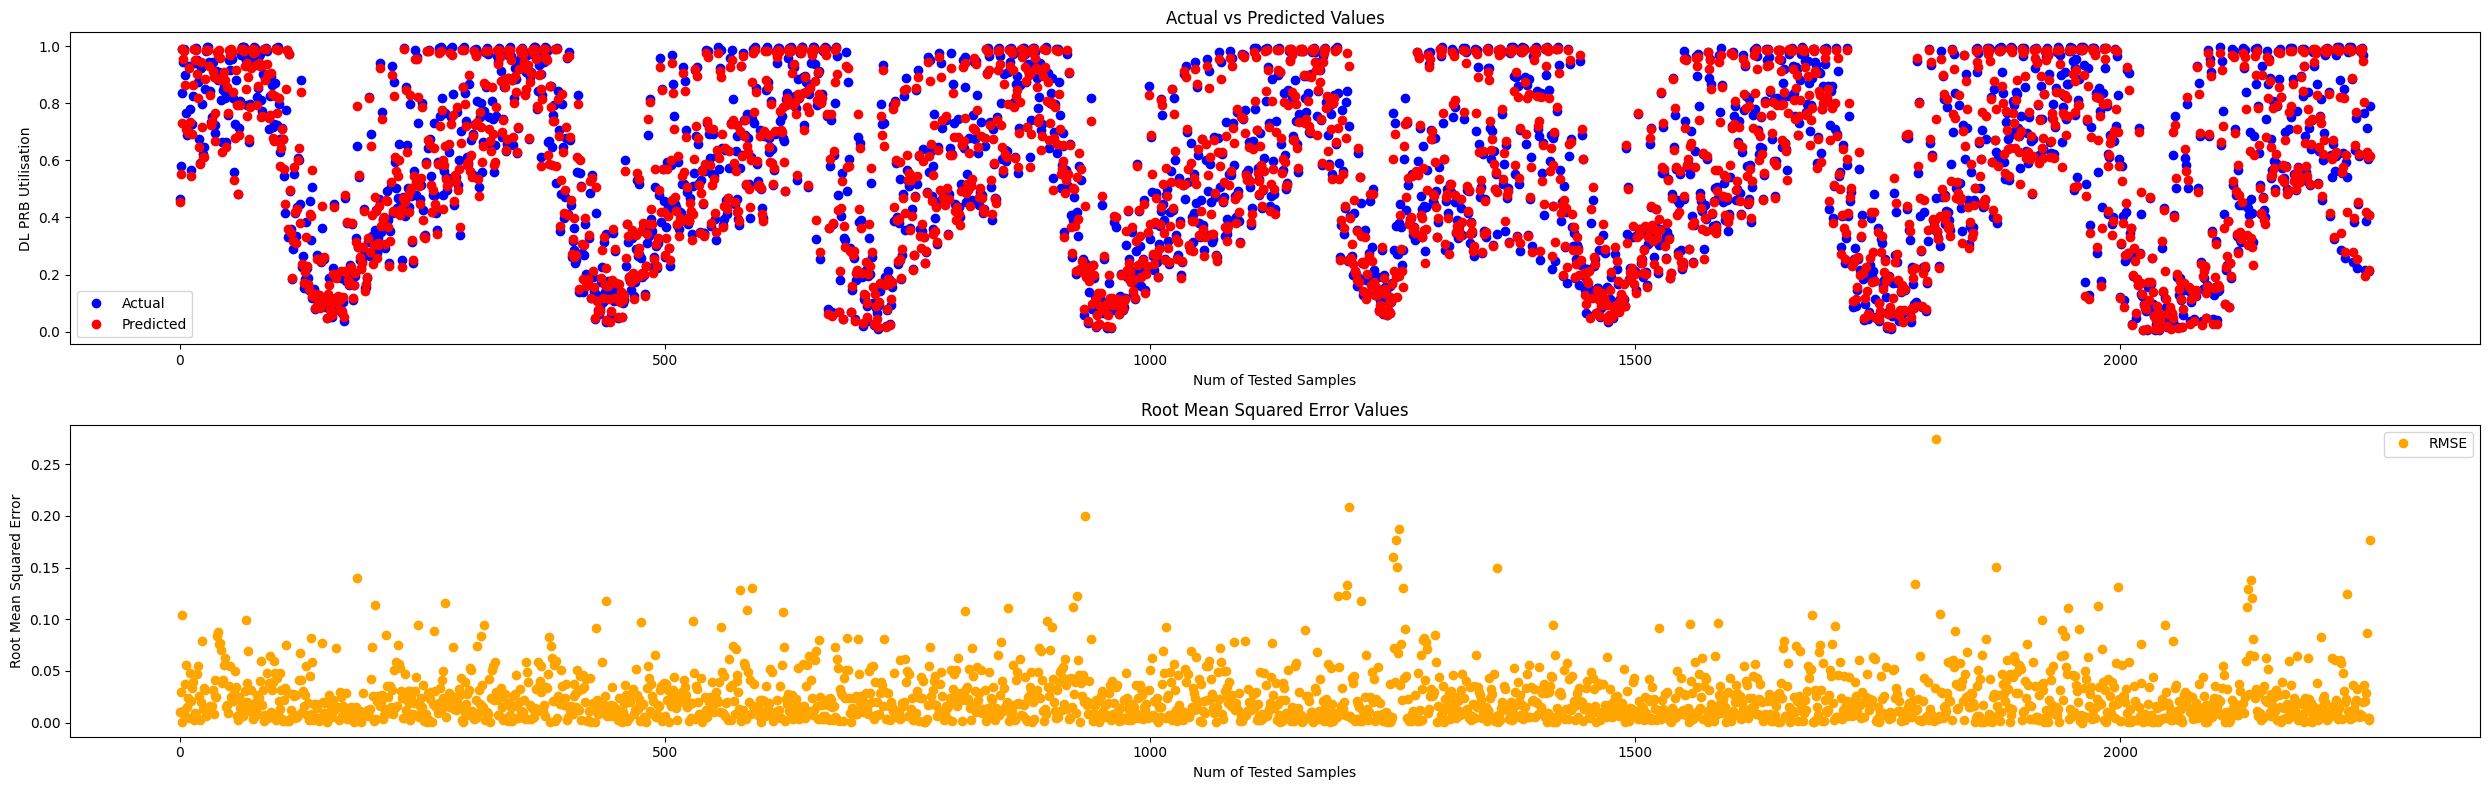

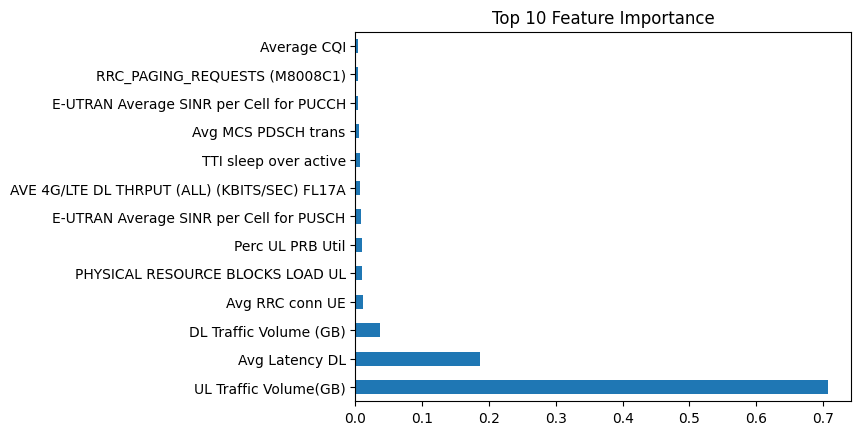

Mean Squared Error: 0.0012234694475926416
R-squared: 0.9862130389491987
Root Mean Squared Error: 0.034978128131628795
Mean Absolute Error: 0.024375289587105022
Mean Absolute Percentage Error: 6.437894871507652%


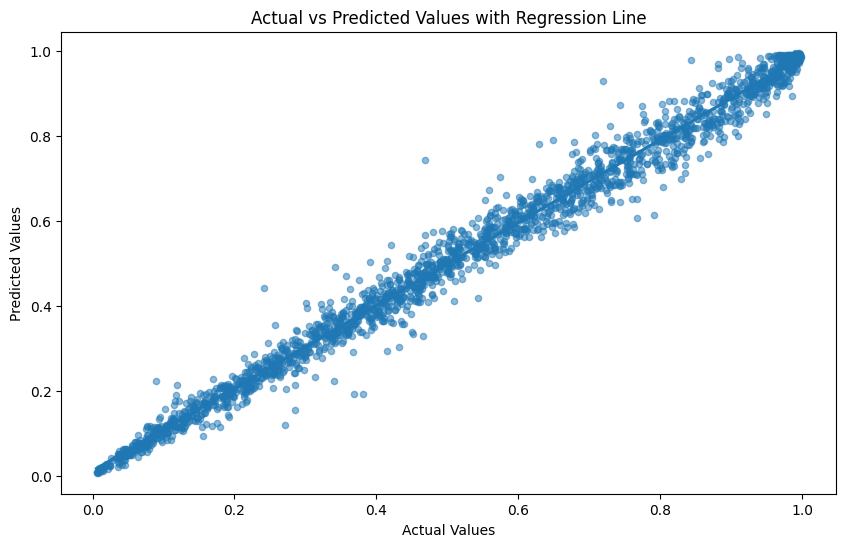

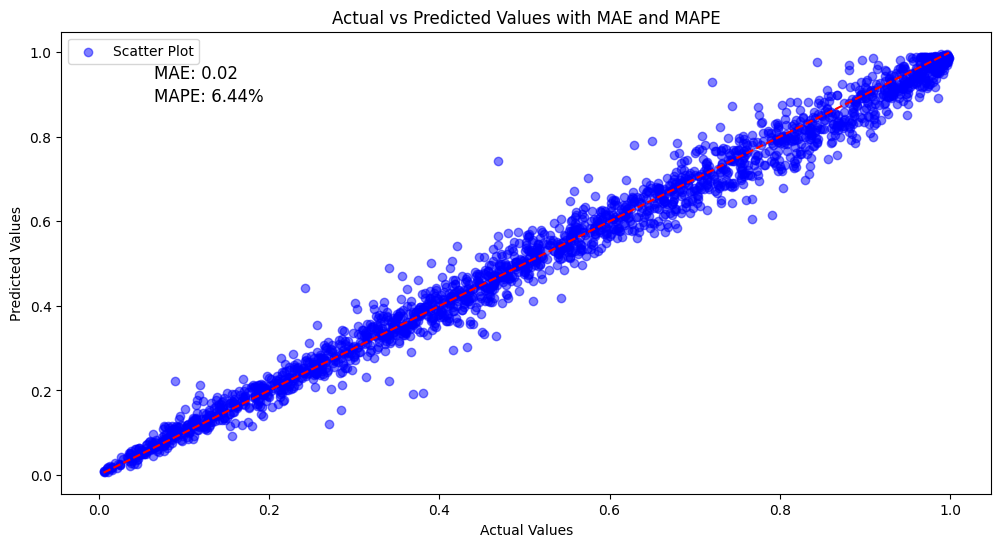

In [ ]:
# Filter data for training and testing
selected_data_for_training = filter_rows_for_training(df)
selected_data_for_testing = filter_rows_for_testing(df)

# Split the selected training data into training and validation sets
train_data, _ = train_test_split(selected_data_for_training, test_size=0.2, random_state=42, shuffle=True)

# Split the selected testing data into testing and validation sets
_, test_data = train_test_split(selected_data_for_testing, test_size=0.2, random_state=42, shuffle=False)

# Train the machine learning model and display actual vs predicted values for training and testing data
trained_model = train_and_display_predictions(train_data, test_data)